In [11]:
import duckdb
import pandas as pd
from statsbombpy import sb

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [12]:
con = duckdb.connect("example2.db")


In [13]:
fouls = con.execute("SELECT * FROM events WHERE type = 'Foul Won'").df()

In [14]:
for i in fouls.columns:
    print(i)

player
possession
match_id
bad_behaviour_card
ball_receipt_outcome
ball_recovery_recovery_failure
block_deflection
carry_end_location
clearance_aerial_won
clearance_body_part
clearance_head
clearance_left_foot
clearance_right_foot
counterpress
dribble_no_touch
dribble_nutmeg
dribble_outcome
duel_outcome
duel_type
duration
foul_committed_advantage
foul_committed_card
foul_committed_type
foul_won_advantage
foul_won_defensive
goalkeeper_body_part
goalkeeper_end_location
goalkeeper_outcome
goalkeeper_position
goalkeeper_technique
goalkeeper_type
index
interception_outcome
location
minute
miscontrol_aerial_won
off_camera
out
pass_aerial_won
pass_angle
pass_assisted_shot_id
pass_body_part
pass_cross
pass_cut_back
pass_deflected
pass_end_location
pass_goal_assist
pass_height
pass_inswinging
pass_length
pass_miscommunication
pass_no_touch
pass_outcome
pass_outswinging
pass_recipient
pass_recipient_id
pass_shot_assist
pass_straight
pass_switch
pass_technique
pass_through_ball
pass_type
period
p

In [15]:

columnsf = [
    "match_id",
    "competition",
    "home_team",
    "home_score",
    "away_team",
    "away_score",
    "referee",
    "team",
    "possession",
    "possession_time",
    "minute",
    "timestamp",
    "player",
    "position",
    "position_most_played",
    "x",
    "y",
    "type_foul_commitedJ",
    "player_foul_commitedJ",
    "position_foul_commitedJ",
    "team_foul_commitedJ",
    "foul_committed_advantage_foul_commitedJ",
    "foul_committed_card_foul_commitedJ",
]

fdf=fouls[columnsf]
fdf

,match_id,competition,home_team,home_score,away_team,away_score,referee,team,possession,possession_time,...,position,position_most_played,x,y,type_foul_commitedJ,player_foul_commitedJ,position_foul_commitedJ,team_foul_commitedJ,foul_committed_advantage_foul_commitedJ,foul_committed_card_foul_commitedJ
0,3825848,Spain - La Liga,Levante UD,2,Eibar,2,None,Levante UD,10,16.613,...,Center Back,Center Back,6.3,44.2,Foul Committed,Borja González Tomás,Center Forward,Eibar,NaN,None
1,3825848,Spain - La Liga,Levante UD,2,Eibar,2,None,Eibar,12,15.037,...,Left Defensive Midfield,Left Defensive Midfield,57.8,67.3,Foul Committed,Víctor Casadesús Castaño,Left Center Forward,Levante UD,NaN,None
2,3825848,Spain - La Liga,Levante UD,2,Eibar,2,None,Eibar,29,4.279,...,Left Back,Left Back,40.5,32.3,Foul Committed,Nabil Ghilas,Right Center Forward,Levante UD,NaN,None
3,3825848,Spain - La Liga,Levante UD,2,Eibar,2,None,Levante UD,31,5.858,...,Left Center Forward,Left Center Forward,54.2,54.5,Foul Committed,Gonzalo Escalante,Right Defensive Midfield,Eibar,NaN,None
4,3825848,Spain - La Liga,Levante UD,2,Eibar,2,None,Levante UD,36,18.309,...,Right Center Midfield,Right Center Midfield,43.7,56.0,Foul Committed,Takashi Inui,Left Wing,Eibar,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11569,266557,Spain - La Liga,Barcelona,1,Valencia,2,David Fernández Borbalan,Barcelona,147,5.032,...,Left Back,Left Back,35.2,28.5,Foul Committed,João Pedro Cavaco Cancelo,Left Center Midfield,Valencia,NaN,None
11570,266557,Spain - La Liga,Barcelona,1,Valencia,2,David Fernández Borbalan,Valencia,155,54.213,...,Left Midfield,Right Midfield,14.4,26.5,Foul Committed,Ivan Rakitić,Right Center Midfield,Barcelona,NaN,None
11571,266557,Spain - La Liga,Barcelona,1,Valencia,2,David Fernández Borbalan,Barcelona,158,10.282,...,Center Defensive Midfield,Center Defensive Midfield,50.9,16.2,Foul Committed,Javier Fuego Martínez,Center Defensive Midfield,Valencia,NaN,None
11572,266557,Spain - La Liga,Barcelona,1,Valencia,2,David Fernández Borbalan,Valencia,169,4.204,...,Right Midfield,Right Midfield,16.5,75.5,Foul Committed,Neymar da Silva Santos Junior,Left Wing,Barcelona,NaN,Yellow Card


In [16]:
fdf["foul_committed_card_foul_commitedJ"].unique()

array([None, 'Yellow Card', 'Second Yellow', 'Red Card'], dtype=object)

In [17]:
fdf['Yellow Card'] = (fdf['foul_committed_card_foul_commitedJ'] == 'Yellow Card').astype(int)
fdf['Second Yellow'] = (fdf['foul_committed_card_foul_commitedJ'] == 'Second Yellow').astype(int)
fdf['Red Card'] = (fdf['foul_committed_card_foul_commitedJ'] == 'Red Card').astype(int)
fdf.head(10)

/var/folders/6j/1nsywzcs1v5_6gn_3972hssr0000gn/T/ipykernel_3006/2490473267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['Yellow Card'] = (fdf['foul_committed_card_foul_commitedJ'] == 'Yellow Card').astype(int)
/var/folders/6j/1nsywzcs1v5_6gn_3972hssr0000gn/T/ipykernel_3006/2490473267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['Second Yellow'] = (fdf['foul_committed_card_foul_commitedJ'] == 'Second Yellow').astype(int)
/var/folders/6j/1nsywzcs1v5_6gn_3972hssr0000gn/T/ipykernel_3006/24

,match_id,competition,home_team,home_score,away_team,away_score,referee,team,possession,possession_time,...,y,type_foul_commitedJ,player_foul_commitedJ,position_foul_commitedJ,team_foul_commitedJ,foul_committed_advantage_foul_commitedJ,foul_committed_card_foul_commitedJ,Yellow Card,Second Yellow,Red Card
0,3825848,Spain - La Liga,Levante UD,2,Eibar,2,None,Levante UD,10,16.613,...,44.2,Foul Committed,Borja González Tomás,Center Forward,Eibar,NaN,None,0,0,0
1,3825848,Spain - La Liga,Levante UD,2,Eibar,2,None,Eibar,12,15.037,...,67.3,Foul Committed,Víctor Casadesús Castaño,Left Center Forward,Levante UD,NaN,None,0,0,0
2,3825848,Spain - La Liga,Levante UD,2,Eibar,2,None,Eibar,29,4.279,...,32.3,Foul Committed,Nabil Ghilas,Right Center Forward,Levante UD,NaN,None,0,0,0
3,3825848,Spain - La Liga,Levante UD,2,Eibar,2,None,Levante UD,31,5.858,...,54.5,Foul Committed,Gonzalo Escalante,Right Defensive Midfield,Eibar,NaN,None,0,0,0
4,3825848,Spain - La Liga,Levante UD,2,Eibar,2,None,Levante UD,36,18.309,...,56.0,Foul Committed,Takashi Inui,Left Wing,Eibar,NaN,None,0,0,0
5,3825848,Spain - La Liga,Levante UD,2,Eibar,2,None,Levante UD,39,2.904,...,14.7,Foul Committed,Borja González Tomás,Center Forward,Eibar,NaN,None,0,0,0
6,3825848,Spain - La Liga,Levante UD,2,Eibar,2,None,Eibar,45,46.218,...,71.0,Foul Committed,José María Martín-Bejarano Serrano,Right Center Midfield,Levante UD,NaN,None,0,0,0
7,3825848,Spain - La Liga,Levante UD,2,Eibar,2,None,Eibar,50,36.458,...,24.8,Foul Committed,José María Martín-Bejarano Serrano,Right Center Midfield,Levante UD,NaN,None,0,0,0
8,3825848,Spain - La Liga,Levante UD,2,Eibar,2,None,Levante UD,52,19.796,...,74.6,Foul Committed,Takashi Inui,Left Wing,Eibar,NaN,None,0,0,0
9,3825848,Spain - La Liga,Levante UD,2,Eibar,2,None,Levante UD,56,5.904,...,41.4,Foul Committed,Borja González Tomás,Center Forward,Eibar,NaN,None,0,0,0


In [71]:
fdf["Red Card"].sum()

np.int64(26)

In [21]:
fdf[fdf['player_foul_commitedJ'].notna()].shape

(11574, 26)

In [24]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


def network_creation(match_foul_data):
    # Create a copy of the match_pass_data to avoid modifying the original DataFrame
    df = match_foul_data.copy()

    # Only keep successful passes with valid recipients
    df = df[df['player_foul_commitedJ'].notna()]

    # Initialize a directed graph
    G = nx.DiGraph()

    # Add edges with weights to the graph
    for _, row in df.iterrows():
        if G.has_edge(row['player'], row['player_foul_commitedJ']):
            # Increment weight if the edge already exists
            G[row['player']][row['player_foul_commitedJ']]['weight'] += 0.01
        else:
            # Add edge with an initial weight of 1
            G.add_edge(row['player'], row['player_foul_commitedJ'], weight=0.1)

    # Calculate centrality measures
    try:
        degree_centrality = nx.degree_centrality(G)
        closeness_centrality = nx.closeness_centrality(G)
        betweenness_centrality = nx.betweenness_centrality(G)
    except nx.PowerIterationFailedConvergence:
        print("Error: Eigenvector centrality did not converge. Check the graph structure.")

    try:
        eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
    except nx.PowerIterationFailedConvergence:
        print("Warning: Eigenvector centrality did not converge. Setting to None.")
        eigenvector_centrality = {node: None for node in G.nodes()}

    # Convert centrality measures to DataFrames
    degree_c = pd.DataFrame(list(degree_centrality.items()), columns=['player', 'degree_c'])
    eigen_c = pd.DataFrame(list(eigenvector_centrality.items()), columns=['player', 'eigen_c'])
    closeness_c = pd.DataFrame(list(closeness_centrality.items()), columns=['player', 'closeness_c'])
    betweenness_c = pd.DataFrame(list(betweenness_centrality.items()), columns=['player', 'betweenness_c'])
    
    #print(df["pass_succes"].unique())    # Perform left joins with the main DataFrame to add centrality measures
    
    result_df = df.merge(degree_c, on='player', how='left')
    result_df = result_df.merge(eigen_c, on='player', how='left')
    result_df = result_df.merge(closeness_c, on='player', how='left')
    result_df = result_df.merge(betweenness_c, on='player', how='left')
    #print(result_df["pass_succes"].unique())    # Perform left joins with the main DataFrame to add centrality measures


    # Return the graph and the updated DataFrame
    return G, result_df


In [56]:


all_teams_graph, all_teams_dataframe = network_creation(fdf)



In [57]:
df = all_teams_dataframe[["player","match_id","player_foul_commitedJ","degree_c", "eigen_c", "closeness_c", "betweenness_c","foul_committed_advantage_foul_commitedJ","Yellow Card",	"Second Yellow",	"Red Card"]]
df

,player,match_id,player_foul_commitedJ,degree_c,eigen_c,closeness_c,betweenness_c,foul_committed_advantage_foul_commitedJ,Yellow Card,Second Yellow,Red Card
0,Zouhair Feddal,3825848,Borja González Tomás,0.097276,0.055330,0.430418,0.003328,NaN,0,0,0
1,Daniel García Carrillo,3825848,Víctor Casadesús Castaño,0.180934,0.099004,0.459960,0.011939,NaN,0,0,0
2,David Juncà Reñé,3825848,Nabil Ghilas,0.120623,0.053136,0.424734,0.006568,NaN,0,0,0
3,Víctor Casadesús Castaño,3825848,Gonzalo Escalante,0.064202,0.042225,0.397773,0.001462,NaN,0,0,0
4,José María Martín-Bejarano Serrano,3825848,Takashi Inui,0.070039,0.036609,0.398759,0.003101,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11569,Jordi Alba Ramos,266557,João Pedro Cavaco Cancelo,0.064202,0.033001,0.397118,0.001828,NaN,0,0,0
11570,Rodrigo Moreno Machado,266557,Ivan Rakitić,0.075875,0.020875,0.378133,0.002409,NaN,0,0,0
11571,Sergio Busquets i Burgos,266557,Javier Fuego Martínez,0.192607,0.075587,0.436650,0.010475,NaN,0,0,0
11572,João Pedro Cavaco Cancelo,266557,Neymar da Silva Santos Junior,0.126459,0.054669,0.424361,0.005578,NaN,1,0,0


In [33]:
df[df["player"]=="Neymar da Silva Santos Junior"]

,player,match_id,player_foul_commitedJ,degree_c,eigen_c,closeness_c,betweenness_c,foul_committed_advantage_foul_commitedJ,Yellow Card,Second Yellow,Red Card
10891,Neymar da Silva Santos Junior,3825660,Mario Gaspar Pérez Martínez,0.352113,0.00023,0.0,0.0,NaN,1,0,0
10892,Neymar da Silva Santos Junior,3825660,Tomás Pina Isla,0.352113,0.00023,0.0,0.0,NaN,0,0,0
10895,Neymar da Silva Santos Junior,3825660,Jonathan dos Santos Ramírez,0.352113,0.00023,0.0,0.0,True,0,0,0
10896,Neymar da Silva Santos Junior,3825660,Jonathan dos Santos Ramírez,0.352113,0.00023,0.0,0.0,NaN,0,0,0
10899,Neymar da Silva Santos Junior,3825660,Daniele Bonera,0.352113,0.00023,0.0,0.0,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11553,Neymar da Silva Santos Junior,266254,Gustavo Daniel Cabral Cáceres,0.352113,0.00023,0.0,0.0,NaN,0,0,0
11561,Neymar da Silva Santos Junior,266557,Enzo Nicolás Pérez,0.352113,0.00023,0.0,0.0,NaN,0,0,0
11562,Neymar da Silva Santos Junior,266557,Antonio Barragán Fernández,0.352113,0.00023,0.0,0.0,NaN,1,0,0
11565,Neymar da Silva Santos Junior,266557,Daniel Parejo Muñoz,0.352113,0.00023,0.0,0.0,NaN,1,0,0


In [67]:
# Aggregation dictionary
agg_dict = {
    "player_foul_commitedJ" : "count",
    'degree_c': 'mean',
    'eigen_c': 'mean',
    "closeness_c":"mean",
    'betweenness_c': 'mean',
    'Yellow Card': 'sum',
    'Red Card': 'sum',

}

by_player = df.groupby("player").agg(agg_dict)
by_player = by_player.reset_index()

by_player

,player,player_foul_commitedJ,degree_c,eigen_c,closeness_c,betweenness_c,Yellow Card,Red Card
0,Abdoul Karim Yoda,10,0.036965,0.019553,0.368882,0.000250,2,0
1,Abdoulaye Doucouré,8,0.050584,0.035057,0.401413,0.000446,2,0
2,Abraham González Casanova,9,0.042802,0.027954,0.378727,0.000466,2,0
3,Adalberto Peñaranda Maestre,41,0.155642,0.084142,0.449672,0.008320,6,0
4,Aderllan Leandro de Jesus Santos,6,0.029183,0.015493,0.354257,0.000307,1,0
...,...,...,...,...,...,...,...,...
494,Íñigo Lekue Martínez,10,0.042802,0.023033,0.382631,0.000610,0,0
495,Íñigo Martínez Berridi,27,0.097276,0.053548,0.423988,0.003536,3,0
496,Óliver Torres Muñoz,17,0.048638,0.019236,0.368882,0.000963,1,0
497,Óscar Esau Duarte Gaitán,5,0.050584,0.039700,0.404102,0.000662,1,0


In [73]:
ppd = pd.read_excel('players_pass_data.xlsx', sheet_name='Stats')


In [74]:
ppd = ppd.add_suffix('_passing')
ppd = ppd.rename(columns={'player_passing': 'player'})
ppd

,player,degree_c_passing,eigen_c_passing,closeness_c_passing,betweenness_c_passing,shot_statsbomb_xg_shotFromPass_passing,SequenceBuildUpXG_passing
0,Abdoul Karim Yoda,1.615385,0.210081,0.866667,0.002409,0.434431,2.249535
1,Abdoulaye Doucouré,1.370370,0.171872,0.750000,0.001477,0.615640,2.097704
2,Abraham González Casanova,1.560000,0.189383,0.833333,0.002851,2.334519,4.195373
3,Adalberto Peñaranda Maestre,1.592593,0.196177,0.818182,0.004457,2.263150,0.617804
4,Aderllan Leandro de Jesus Santos,1.655172,0.188509,0.828571,0.029203,0.030815,1.803040
...,...,...,...,...,...,...,...
533,Íñigo Lekue Martínez,1.875000,0.221813,0.960000,0.007572,0.585020,1.930899
534,Íñigo Martínez Berridi,1.730769,0.211547,0.866667,0.008227,0.286110,7.190235
535,Óliver Torres Muñoz,1.833333,0.224816,0.923077,0.009136,1.185552,2.849200
536,Óscar Esau Duarte Gaitán,1.440000,0.176130,0.781250,0.003070,0.069180,1.681381


In [75]:
by_player = by_player.merge(ppd, on='player', how='left')

by_player

,player,player_foul_commitedJ,degree_c,eigen_c,closeness_c,betweenness_c,Yellow Card,Red Card,degree_c_passing,eigen_c_passing,closeness_c_passing,betweenness_c_passing,shot_statsbomb_xg_shotFromPass_passing,SequenceBuildUpXG_passing
0,Abdoul Karim Yoda,10,0.036965,0.019553,0.368882,0.000250,2,0,1.615385,0.210081,0.866667,0.002409,0.434431,2.249535
1,Abdoulaye Doucouré,8,0.050584,0.035057,0.401413,0.000446,2,0,1.370370,0.171872,0.750000,0.001477,0.615640,2.097704
2,Abraham González Casanova,9,0.042802,0.027954,0.378727,0.000466,2,0,1.560000,0.189383,0.833333,0.002851,2.334519,4.195373
3,Adalberto Peñaranda Maestre,41,0.155642,0.084142,0.449672,0.008320,6,0,1.592593,0.196177,0.818182,0.004457,2.263150,0.617804
4,Aderllan Leandro de Jesus Santos,6,0.029183,0.015493,0.354257,0.000307,1,0,1.655172,0.188509,0.828571,0.029203,0.030815,1.803040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,Íñigo Lekue Martínez,10,0.042802,0.023033,0.382631,0.000610,0,0,1.875000,0.221813,0.960000,0.007572,0.585020,1.930899
495,Íñigo Martínez Berridi,27,0.097276,0.053548,0.423988,0.003536,3,0,1.730769,0.211547,0.866667,0.008227,0.286110,7.190235
496,Óliver Torres Muñoz,17,0.048638,0.019236,0.368882,0.000963,1,0,1.833333,0.224816,0.923077,0.009136,1.185552,2.849200
497,Óscar Esau Duarte Gaitán,5,0.050584,0.039700,0.404102,0.000662,1,0,1.440000,0.176130,0.781250,0.003070,0.069180,1.681381


In [76]:

import pandas as pd

# Define the columns to check for outliers
columns = ['player_foul_commitedJ', 'degree_c', 'eigen_c', 'closeness_c', 'betweenness_c', 'Yellow Card', 'Red Card', 'degree_c_passing', 'eigen_c_passing', 'closeness_c_passing', 'betweenness_c_passing', 'shot_statsbomb_xg_shotFromPass_passing', 'SequenceBuildUpXG_passing']


# Function to remove outliers based on IQR
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter out rows with outliers in the column
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove rows with outliers
cleaned_df = remove_outliers(by_player, columns)

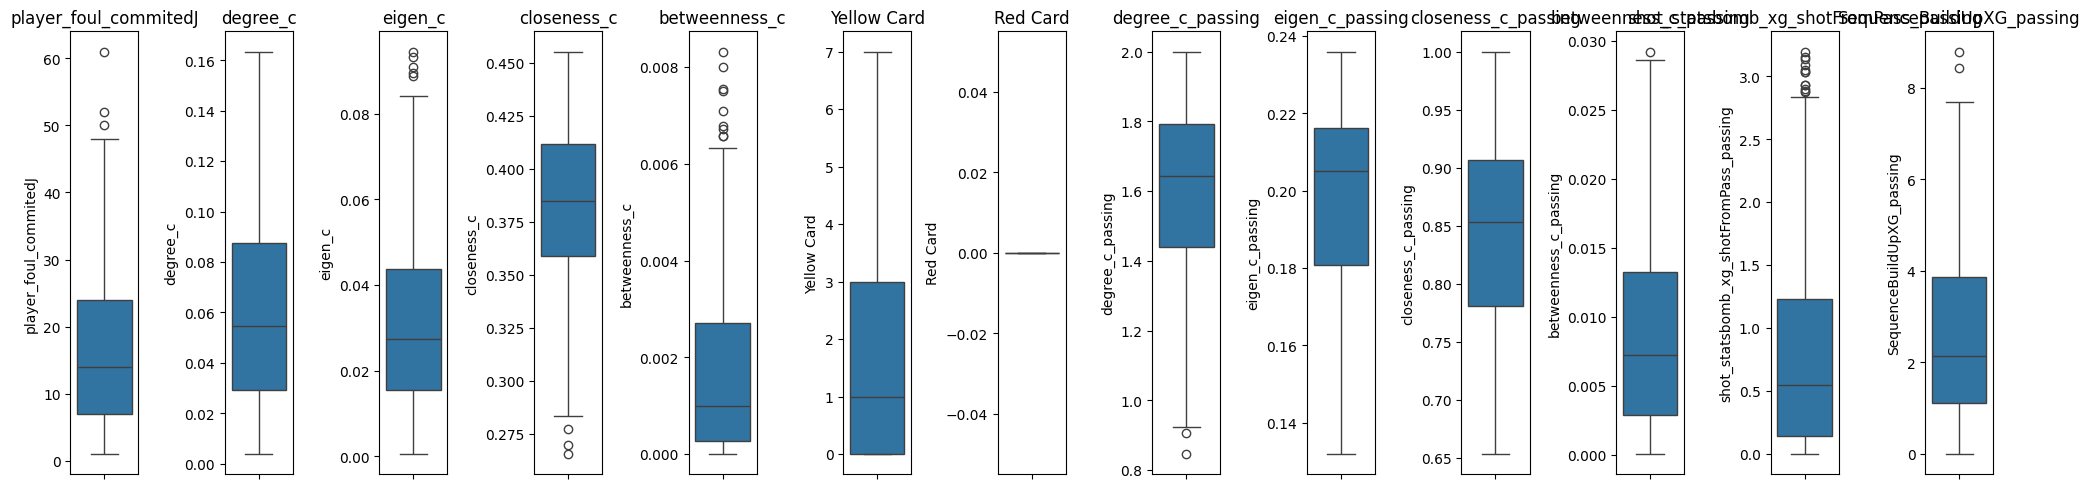

In [77]:

# Set up the figure and axes
fig, axes = plt.subplots(1, len(columns), figsize=(20, 5), sharey=False)  # Set sharey=False for independent y-axes

# Create a boxplot for each column
for i, col in enumerate(columns):
    sns.boxplot(data=cleaned_df[col], ax=axes[i])
    axes[i].set_title(col)  # Set title for each plot

# Adjust layout
plt.tight_layout()
plt.show()

/var/folders/6j/1nsywzcs1v5_6gn_3972hssr0000gn/T/ipykernel_3006/2919895720.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=cleaned_df[col], ax=axes[i], fill=True)


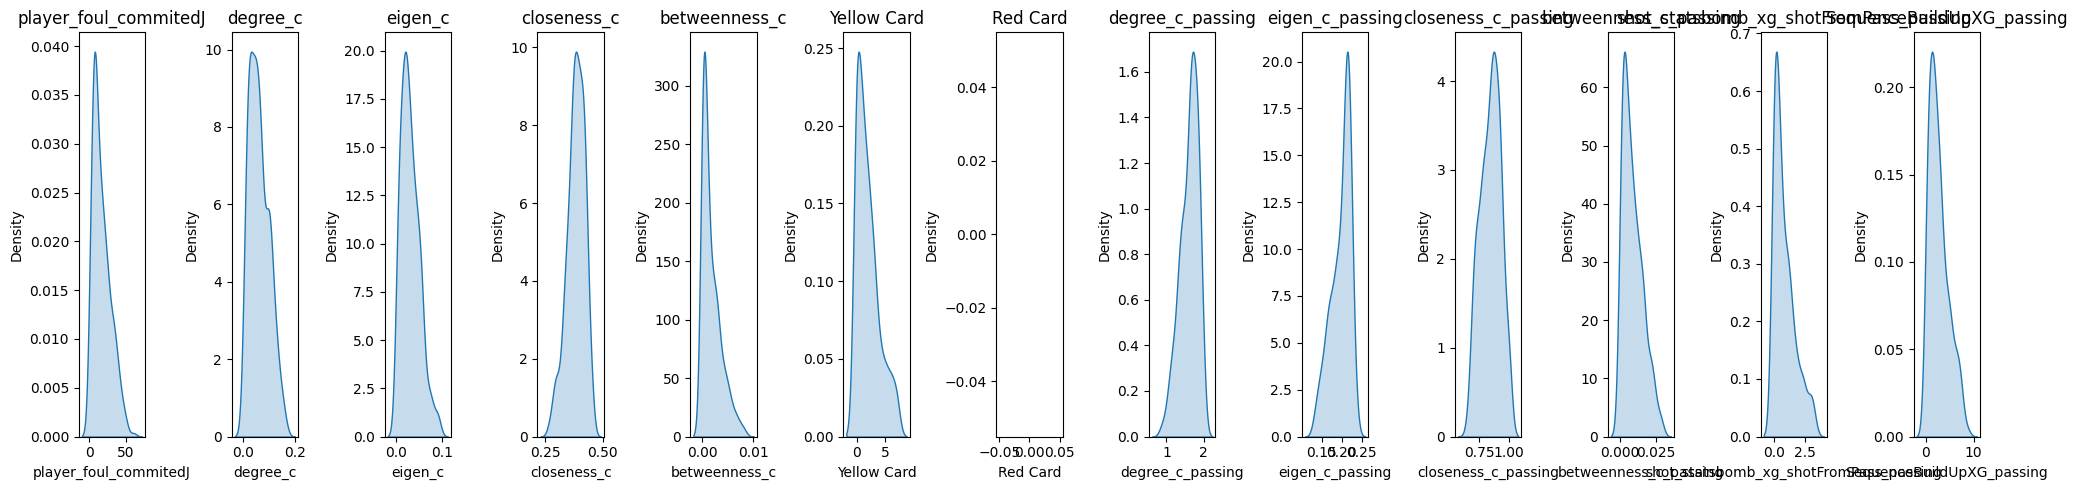

In [78]:
# Set up the figure and axes
fig, axes = plt.subplots(1, len(columns), figsize=(20, 5), sharey=False)  # 1 row, len(columns) columns

# Plot KDE for each column
for i, col in enumerate(columns):
    sns.kdeplot(data=cleaned_df[col], ax=axes[i], fill=True)
    axes[i].set_title(col)  # Set title for each plot

# Adjust layout
plt.tight_layout()
plt.show()

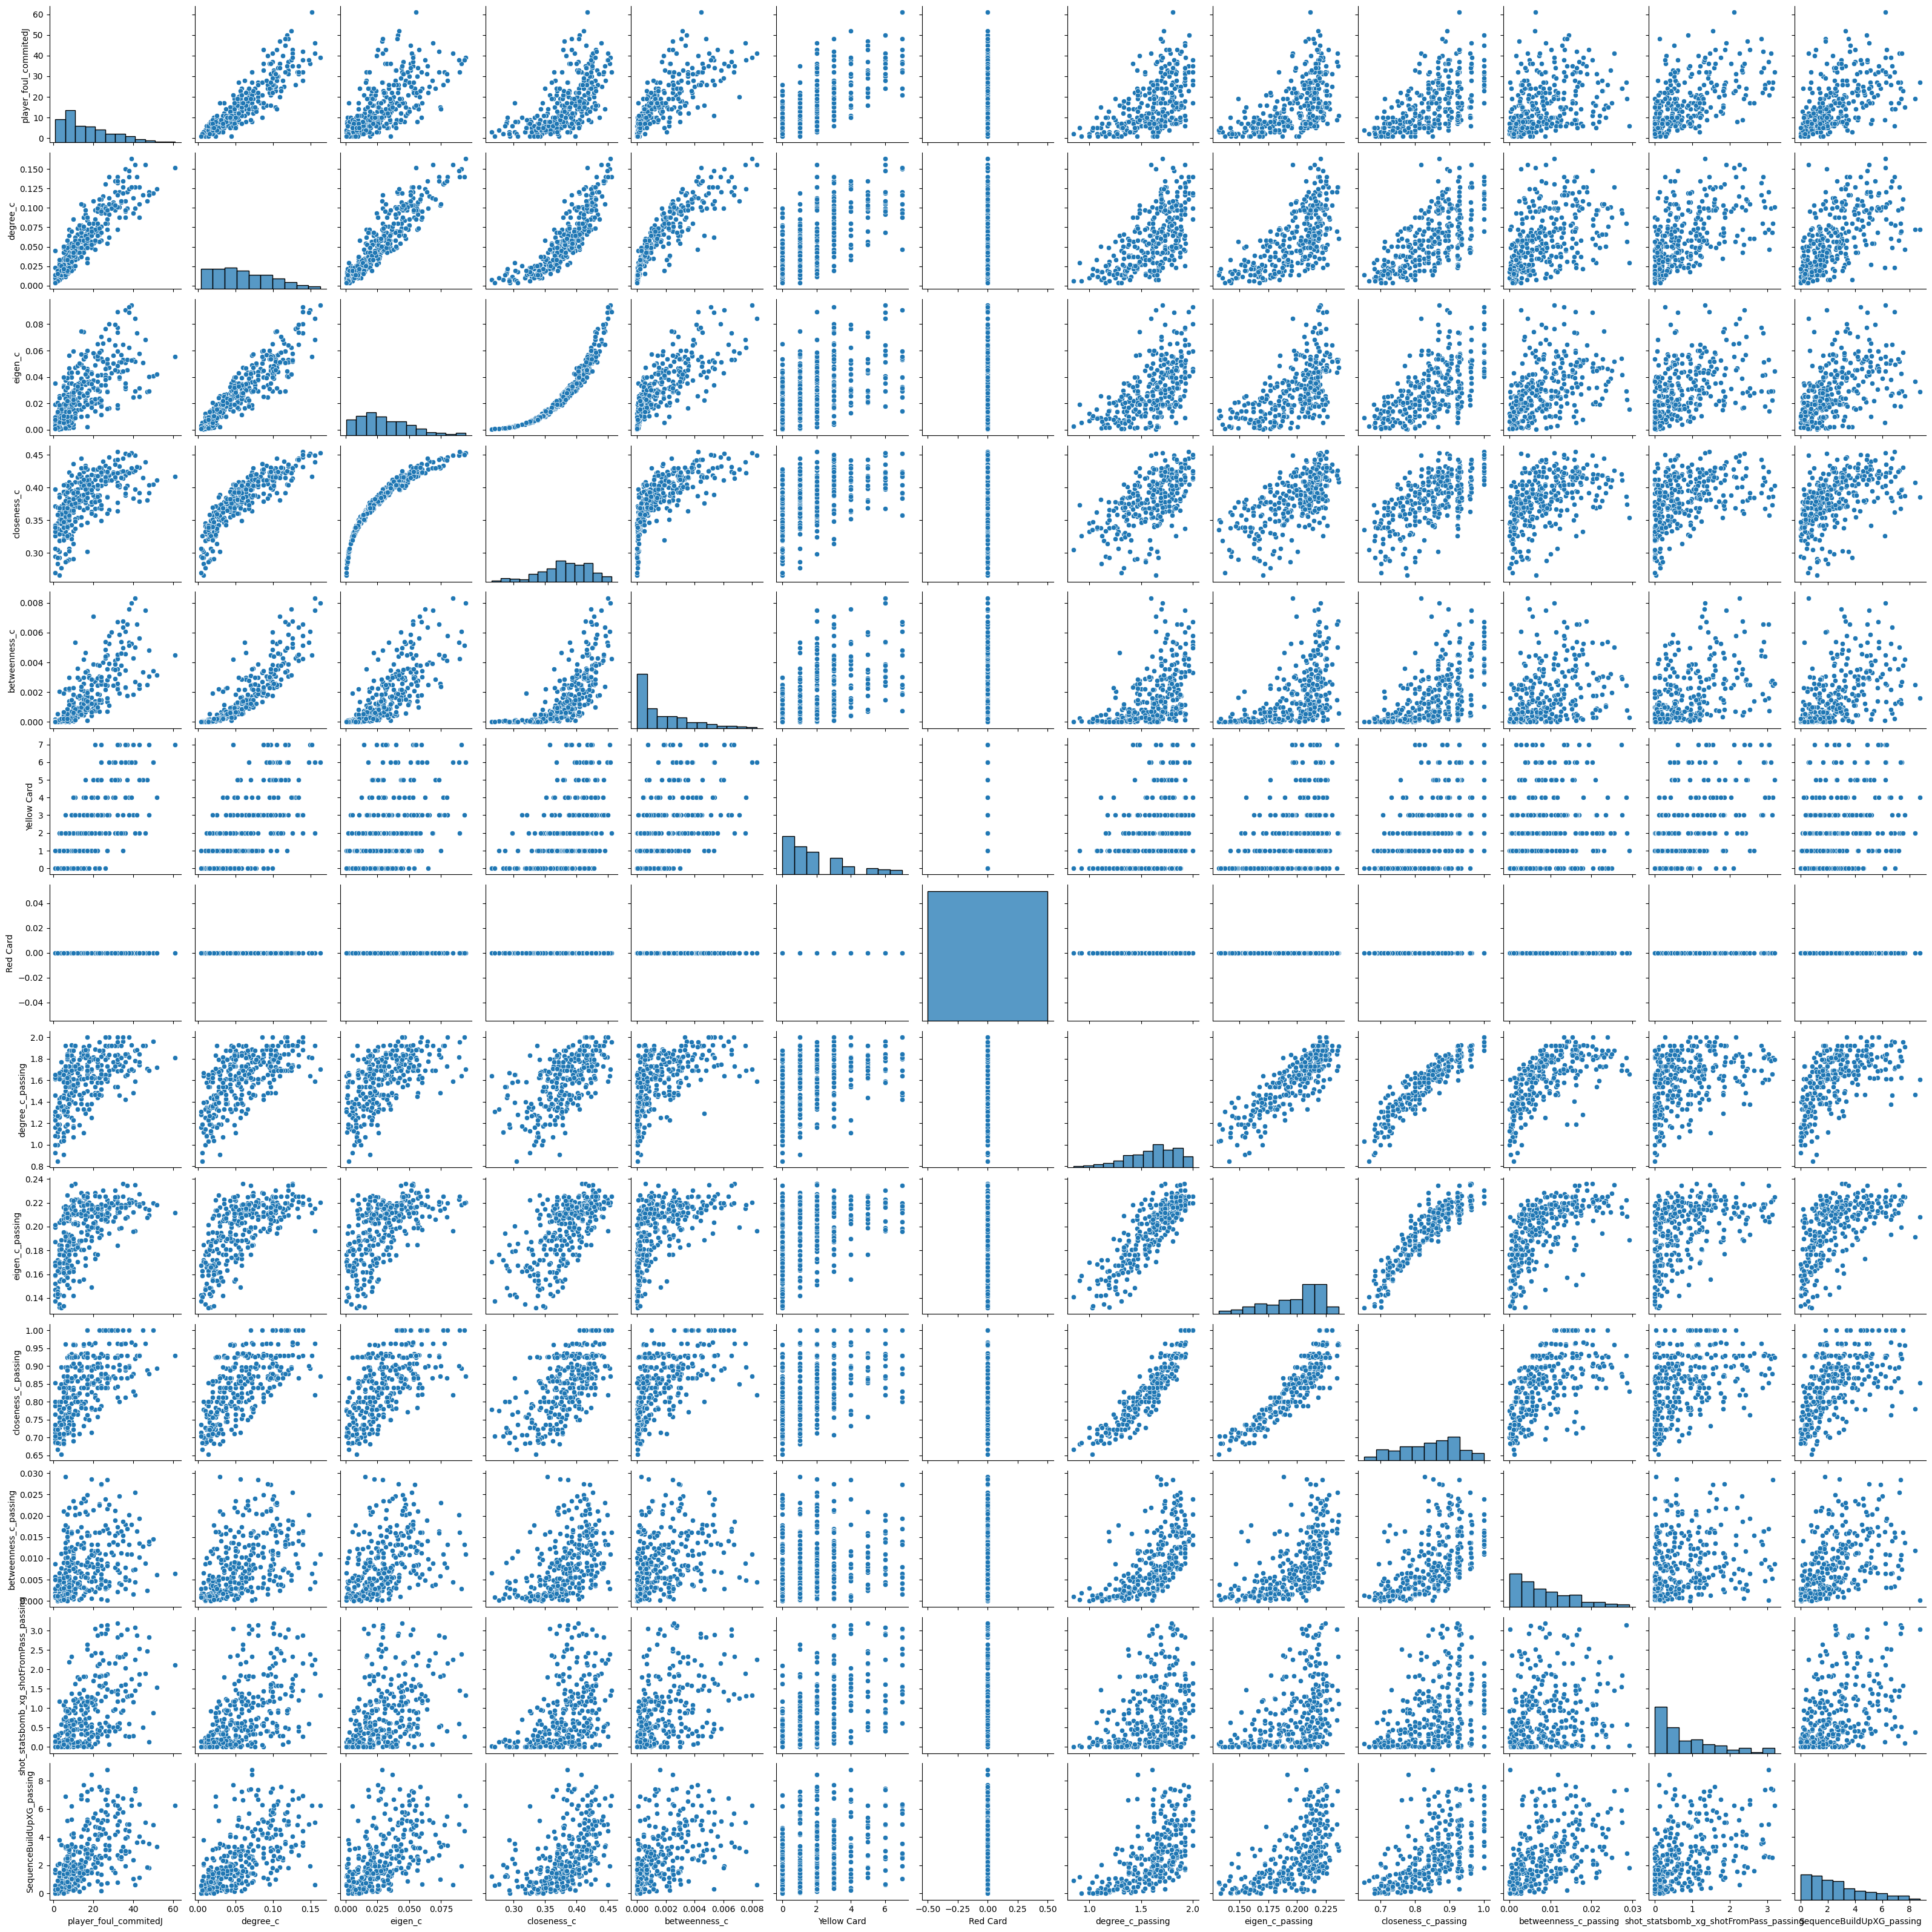

In [79]:
sns.pairplot(cleaned_df[columns])


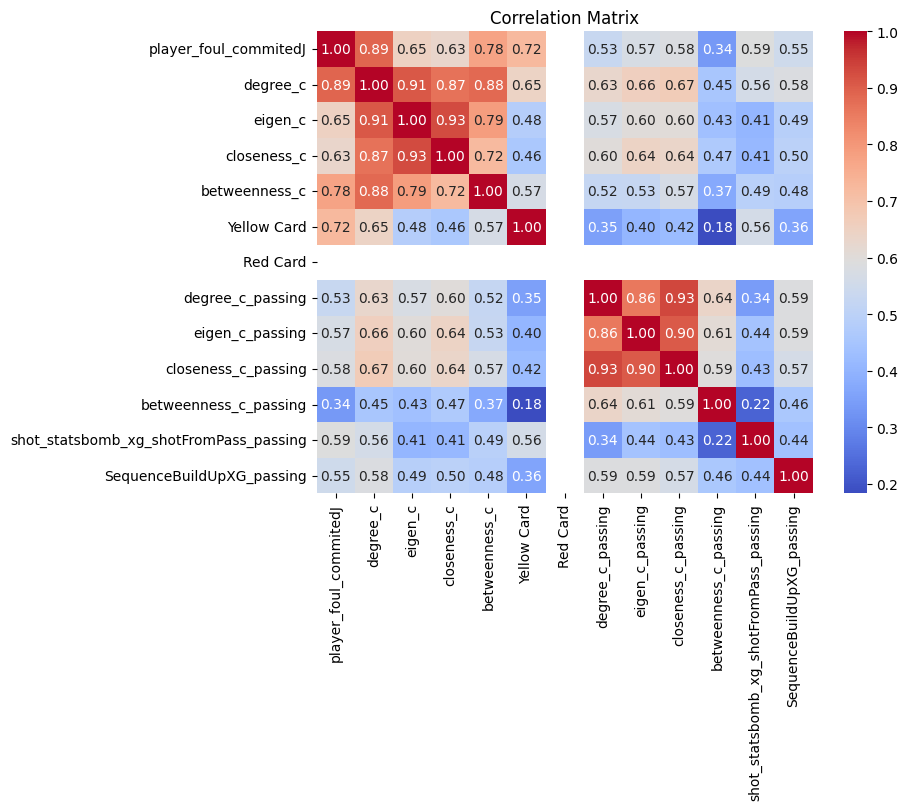

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisini bir heatmap ile görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cleaned_df[columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [20]:
fdf[fdf["match_id"] == 3825848].groupby("player")["player_foul_commitedJ"].count()

player
Adrián González Morales               2
Aleksandar Pantić                     1
Ander Capa Rodríguez                  1
Antonio García Aranda                 5
Borja Ekiza Imaz                      1
Daniel García Carrillo                2
David Juncà Reñé                      1
Deyverson Brum Silva Acosta           3
Jefferson Andrés Lerma Solís          2
José Luis Morales Nogales             1
José María Martín-Bejarano Serrano    3
Juan Francisco García García          1
Rubén García Santos                   2
Sergio Enrich Ametller                2
Sergio Gontán Gallardo                1
Takashi Inui                          2
Víctor Camarasa Ferrando              3
Víctor Casadesús Castaño              1
Zouhair Feddal                        2
Name: player_foul_commitedJ, dtype: int64

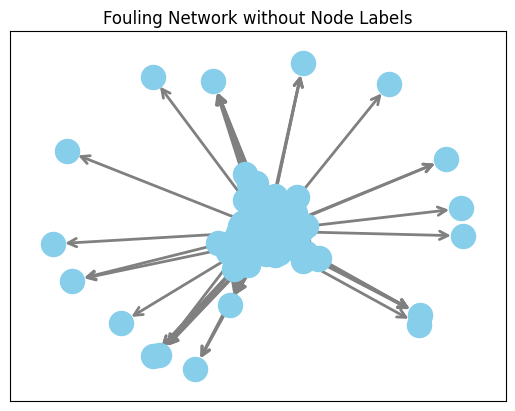

In [27]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df = fdf.copy()  # Create a copy to avoid SettingWithCopyWarning

# Create the NetworkX graph
G = nx.DiGraph()  # Directed graph
for _, row in df.iterrows():
    if G.has_edge(row['player'], row['player_foul_commitedJ']):
        G[row['player']][row['player_foul_commitedJ']]['weight'] += 0.1  # Increment weight if edge already exists
    else:
        G.add_edge(row['player'], row['player_foul_commitedJ'], weight=1)  # Initialize weight as 1

# Get edge weights for visualization (scaled for thickness)
edges = G.edges(data=True)
weights = [2 * edge[2]['weight'] for edge in edges]  # Scale weights (e.g., multiply by 2)

# Use a NetworkX layout for node positioning
positions = nx.spring_layout(G)  # Automatically position nodes using the spring layout


# Draw nodes and edges
nx.draw_networkx_nodes(G, positions, node_size=300, node_color="skyblue")
# Removed the node label drawing
# nx.draw_networkx_labels(G, positions, font_size=10, font_color="black", ax=ax)
nx.draw_networkx_edges(
    G, positions, edge_color="gray", width=weights, arrowstyle='->', arrowsize=15
)



plt.title("Fouling Network without Node Labels")
plt.show()


In [33]:
fdf.groupby("player")["player_foul_commitedJ"].count()

np.float64(23.194388777555112)

In [ ]:
import pandas as pd
import networkx as nx
import gravis as gv

# Filter the DataFrame for the specific match
df = fdf.copy()

# Create the NetworkX graph
G = nx.DiGraph()  # Directed graph
for _, row in df.iterrows():
    if G.has_edge(row['player'], row['player_foul_commitedJ']):
        G[row['player']][row['player_foul_commitedJ']]['weight'] += 0.1  # Increment weight if edge already exists
    else:
        G.add_edge(row['player'], row['player_foul_commitedJ'], weight=1)  # Initialize weight as 1

# Visualize with gravis
gv.d3(G)  # Set `node_label=False` to remove player names
